<a href="https://colab.research.google.com/github/Hritik8005/Vehicle-Image-Classification/blob/main/Vehicle_Type_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import random
import shutil

In [ ]:
# Define the path to the parent folder containing class subfolders
parent_folder = r'/content/drive/MyDrive/Vehicle Type Recognition'

In [ ]:
# Create folders for train and test data
train_folder = 'train_data'
test_folder = 'test_data'

In [ ]:
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

In [ ]:
# Define the train-test split ratio
train_ratio = 0.8

In [ ]:
class_names = os.listdir(parent_folder)

In [ ]:
# To create a Train & Test Data set
for class_name in class_names:
    class_folder = os.path.join(parent_folder, class_name)
    images = os.listdir(class_folder)
    random.shuffle(images)  # Shuffle the images randomly

    # Split images into train and test based on the train_ratio
    split_index = int(train_ratio * len(images))
    train_images = images[:split_index]
    test_images = images[split_index:]

    # Move train images to the train folder
    for image in train_images:
        src_path = os.path.join(class_folder, image)
        dest_path = os.path.join(train_folder, class_name, image)
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)
        shutil.move(src_path, dest_path)

    # Move test images to the test folder
    for image in test_images:
        src_path = os.path.join(class_folder, image)
        dest_path = os.path.join(test_folder, class_name, image)
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)
        shutil.move(src_path, dest_path)

In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
import keras
from tensorflow.keras import layers,models
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
data_dir = keras.utils.image_dataset_from_directory(
    directory = r'/content/drive/MyDrive/Vehicle Type Recognition/train_data')

Found 320 files belonging to 4 classes.


In [ ]:
# Normalizing the data to 0-1 range
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Loading the train and test data
train_data = train_datagen.flow_from_directory(directory=r"/content/drive/MyDrive/Vehicle Type Recognition/train_data",
                                               target_size=(256, 256),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory=r"/content/drive/MyDrive/Vehicle Type Recognition/test_data",
                                               target_size=(256, 256),
                                               batch_size=32,
                                               class_mode="categorical")


Found 320 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [ ]:
# To check classes present in the data
class_name = data_dir.class_names
class_name

['Bus', 'Car', 'Truck', 'motorcycle']

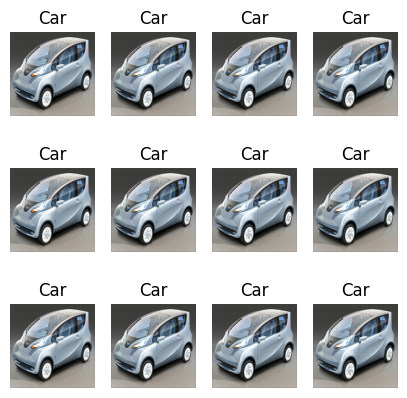

In [ ]:
# ploting the image
plt.figure(figsize=(5,5))
for image_batch,label_batch in data_dir.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype('uint8'))
        plt.title(class_name[label_batch[0]])
        plt.axis("off")

In [ ]:
'''model = Sequential([
  layers.Conv2D(32, 3, padding='same', activation='relu',input_shape=(256,256,3)),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Flatten(),

  layers.Dense(128,activation="relu"),
  layers.Dropout(0.2),
  layers.Dense(64,activation="relu"),
  layers.Dropout(0.2),
  layers.Dense(4,activation="softmax")
])'''

In [ ]:
# Building the CNN Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.BatchNormalization()),
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(4, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_13 (Ba  (None, 254, 254, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                      

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=["accuracy"])

In [ ]:
# EarlyStopping to reduce a model overfitting
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
# Fit the model
history = model.fit(train_data,
                    epochs=20,
                    validation_data=test_data,
                    callbacks=callback)

Epoch 1/20
10/10 [==============================] - 82s 8s/step - loss: 5.2963 - accuracy: 0.2594 - val_loss: 1.3856 - val_accuracy: 0.3625
Epoch 2/20
10/10 [==============================] - 83s 8s/step - loss: 1.3570 - accuracy: 0.3625 - val_loss: 1.3899 - val_accuracy: 0.2500
Epoch 3/20
10/10 [==============================] - 80s 8s/step - loss: 1.2080 - accuracy: 0.4406 - val_loss: 1.3725 - val_accuracy: 0.3000
Epoch 4/20
10/10 [==============================] - 78s 8s/step - loss: 1.0718 - accuracy: 0.5437 - val_loss: 1.3692 - val_accuracy: 0.3875
Epoch 5/20
10/10 [==============================] - 78s 8s/step - loss: 0.8531 - accuracy: 0.6531 - val_loss: 1.3626 - val_accuracy: 0.3375
Epoch 6/20
10/10 [==============================] - 88s 9s/step - loss: 0.6959 - accuracy: 0.7281 - val_loss: 1.3064 - val_accuracy: 0.3625
Epoch 7/20
10/10 [==============================] - 85s 8s/step - loss: 0.5566 - accuracy: 0.7750 - val_loss: 1.3260 - val_accuracy: 0.3875
Epoch 8/20
10/10 [==

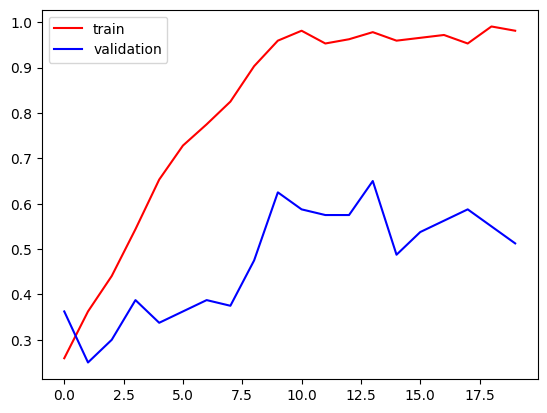

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

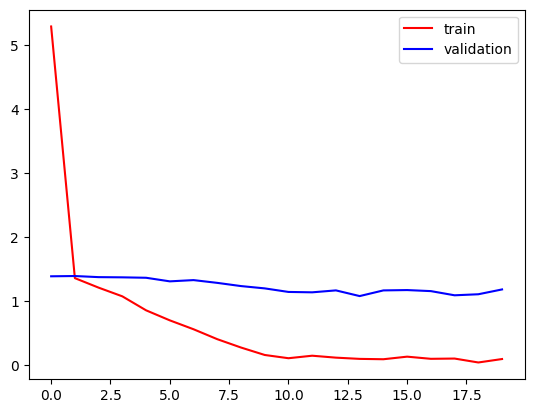

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# Prediction on test data
def load_and_resize_image(filename, size):

  # Load image
  img = tf.io.read_file(filename)

  # Compile image
  img = tf.image.decode_image(img)

  # Resize image
  img = tf.image.resize(img, [size, size])

  # Scale the tensor
  img = img / 255

  return img

image = load_and_resize_image(r"/content/drive/MyDrive/Vehicle Type Recognition/test_data/Truck/Image_31.jpg",256)

In [ ]:
pred = model.predict(tf.expand_dims(image, axis=0))
pred

1/1 [==============================] - 0s 471ms/step


array([[0.09094314, 0.26970524, 0.5164363 , 0.12291535]], dtype=float32)

In [ ]:
class_name[pred[0].argmax()]

'Truck'

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
train_labels = to_categorical(train_data, num_classes=4)
test_labels = to_categorical(test_data, num_classes=4)